<h1 style="text-align:center;">IDFC FAME 2.0 ROUND 2 CODES</h1>

I have done much more analysis of the given dataset, only the most relevant ones are included here.
You can access all the other jupyter files [here]().

<h2 style="text-align:center;">Exploratory Data Analysis</h2>


In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from matplotlib.legend_handler import HandlerLine2D

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier




import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#reading files and columns

df = pd.read_csv('Training data file.csv', index_col='Customer_No')
df_test = pd.read_csv('Validation Data file.csv', index_col='Customer_No')
df1 = df.copy()
col = df.columns

In [4]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,NaN,0.0,NaN,Yes,0.285714,0.428571,1977,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
2,1,30831,68,100.0,1,NaN,0.0,NaN,Yes,0.000000,0.200000,1990,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
3,1,56708,39,50.0,-3,NaN,0.0,NaN,Yes,0.200000,0.200000,1995,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
4,0,43551,76,NaN,0,NaN,0.0,NaN,No,0.000000,0.000000,1997,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
5,3,15287,23,33.0,11,NaN,0.0,NaN,Yes,0.250000,0.250000,1995,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


Function for Missing values in each column

In [5]:
def missingdata_percentage(df, per=0):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            count = df[col].isna().sum()
            percentage = 100*df[col].isna().sum()/df.shape[0]
            if percentage>=per:
              missing = missing.append({'category' : col, 'percentage' : percentage, 'count' : int(count)}, ignore_index=True)
    missing.sort_values(by=['percentage'], inplace=True, ascending=False)
    return missing

In [6]:
train_data_Miss = missingdata_percentage(df)
train_data_Miss

,category,percentage,count
3,CoAp_Income,94.931879,77135.0
1,Max_Ratio_OC_Pending_POS,89.407160,72646.0
6,Total_Field_Trails,67.335360,54712.0
7,Total_Resolved,61.911560,50305.0
5,Perc_Paymode_Cheq_Fail,28.893702,23477.0
0,Max_Perc_Def_Chg_Pending,25.941196,21078.0
2,N_PosBkt_L3m,6.569604,5338.0
8,Max_Loan_Balance_Others,0.419677,341.0
4,Max_DPD_L3m,0.299066,243.0


In [7]:
#also checking test data to ensure distribution of null values are similar
test_data_Miss = missingdata_percentage(df_test)
test_data_Miss

,category,percentage,count
3,CoAp_Income,95.060045,28576.0
1,Max_Ratio_OC_Pending_POS,89.551246,26920.0
6,Total_Field_Trails,67.619174,20327.0
7,Total_Resolved,62.117029,18673.0
5,Perc_Paymode_Cheq_Fail,28.638435,8609.0
0,Max_Perc_Def_Chg_Pending,24.513489,7369.0
2,N_PosBkt_L3m,6.157480,1851.0
4,Max_DPD_L3m,0.392535,118.0
8,Max_Loan_Balance_Others,0.372576,112.0


In [8]:
#checking extent of imbalance in data
df['Target_Flag'].value_counts()

0    71469
1     9784
Name: Target_Flag, dtype: int64

### Let's start filling missing values in descending order.

### Handling "CoAp_Income" & "Max_Ratio_OC_Pending_POS"
* Upon closer inspection "CoAp_Income"(income of co-applicant) column looks like a optional entry and hence so many missing values. 95% of them are missing values so they won't add any value to the data hence we can drop this column.


* Max_Ratio_OC_Pending_POS Column also have 90% of missing values so we can also drop this column. Or by using some logic it actually makes sense that these customer may have paid their overdue charges. Also there are some zeroes present in this column but they might correspond to people who didn't had any ovedue charges at all. We will try both approaches and see what we can do.



In [9]:
#Let's see how many 0's are present already in this column to validate our hypothesis
count = df['Max_Ratio_OC_Pending_POS'].value_counts()[0]
count

249

#### Now lets examine null values of "Total_field_trials" and "Total_resolved"

In [10]:
#Count of null values:
df['Total_Field_Trails'].isna().sum(), df['Total_Resolved'].isna().sum()

(54712, 50305)

In [11]:
# Distribution of null values:
df['Total_Field_Trails'].value_counts(), df['Total_Resolved'].value_counts()

(0.0    18186
 1.0     5993
 2.0     1725
 3.0      567
 4.0       49
 5.0       13
 6.0        6
 9.0        1
 7.0        1
 Name: Total_Field_Trails, dtype: int64,
 1.0    15255
 2.0     7032
 3.0     4881
 0.0     3780
 Name: Total_Resolved, dtype: int64)

In [12]:
# Checking occurences of null values in both the fields simultaneously:
checking_common_occurences = df[(df['Total_Field_Trails'].isna() ) & (df['Total_Resolved'].isna())].shape[0]
checking_common_occurences

50305

From above code we can confirm that whenever Total field trial is null then Total Resolved is also null.<br>
Since there are more than 40% data is missing from these two columns we can either drop them or we can also replace them with mode of the Trials column. We will try both.

In [13]:
count = df['Total_Field_Trails'].value_counts()[0]
count

18186

In [14]:
df['Total_Field_Trails'].mode(), df['Total_Resolved'].mode()

(0    0.0
 Name: Total_Field_Trails, dtype: float64,
 0    1.0
 Name: Total_Resolved, dtype: float64)

Mode of total resolved is 1 but that doesn't make sense when field trials are 0 so we will replace them with 0 only.

### Now lets look at the 'Perc_Paymode_Cheq_Fail' column.

<Axes: >

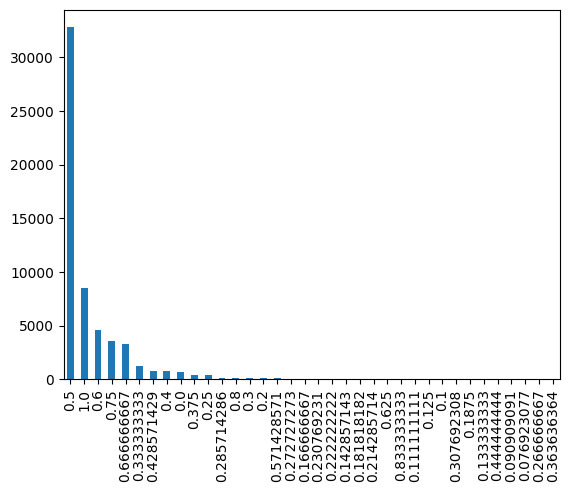

In [15]:
def_chg_perc = df['Perc_Paymode_Cheq_Fail'].value_counts()[df['Perc_Paymode_Cheq_Fail'].value_counts() >= 0]
def_chg_perc.plot(kind='bar')

In [16]:
df['Perc_Paymode_Cheq_Fail'].value_counts()[0.0]

710

* We see that some of the values are 0 thus it means that customer with 0 percent fail rate are included and null values are customer that have never attempted to pay via cheque.


In [17]:
df['Target_Flag'][df['Perc_Paymode_Cheq_Fail'].isna()].value_counts()

0    21735
1     1742
Name: Target_Flag, dtype: int64

In [18]:
df['Target_Flag'][df['Perc_Paymode_Cheq_Fail'].notna()].value_counts()

0    49734
1     8042
Name: Target_Flag, dtype: int64

In [19]:
df['Target_Flag'][df['Perc_Paymode_Cheq_Fail'] == 0].value_counts()

0    652
1     58
Name: Target_Flag, dtype: int64

Its notable that only 7% of null values are defaulters and 14% of not null values are defaulters. And 0 suggest that 8% of values are defaulters.<br>
Because there are about 25% of null data filling with 0's may mislead data. And since this is a continuous variable filling with median could be a very good idea.

In [20]:
df['Perc_Paymode_Cheq_Fail'].median()

0.5

#### Now lets explore "Max_Perc_Def_Chg_Pending" column

In [21]:
null_perc_def_chg = df['Max_Perc_Def_Chg_Pending'].isna().sum()
null_perc_def_chg

21078

In [22]:
df['Target_Flag'][df['Max_Perc_Def_Chg_Pending'] == 0].value_counts()

0    4764
1     513
Name: Target_Flag, dtype: int64

Since there are already 0's present, Null values may mean that person never had any default charge. So lets check amount of customer with default in past 12 months and Max_Perc_Def_Chg_Pending as null.

In [23]:
null_without_default = df['Max_Perc_Def_Chg_Pending'].isna()[df['Ever_Default_L12M'] == 'No'].sum()
null_with_default = df['Max_Perc_Def_Chg_Pending'].isna()[df['Ever_Default_L12M'] == 'Yes'].sum()
null_with_default/null_perc_def_chg, null_without_default/null_perc_def_chg

(0.19944966315589716, 0.8005503368441028)

We can see that customer without default in last 12 months have 80% of the null values and rest does have default.
But still we cannot be sure of imputation with something like 0. 
A safe way would be to take median or mode of the column.

<Axes: >

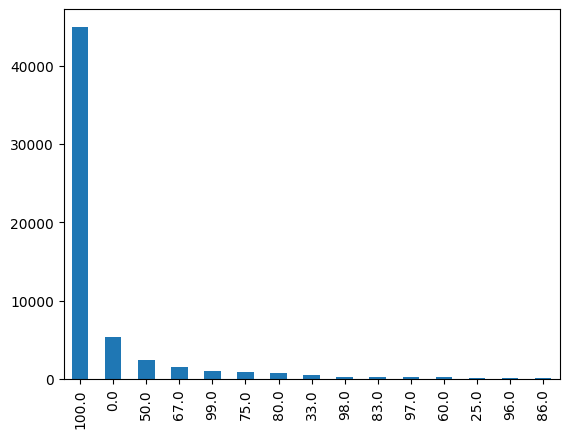

In [24]:
def_chg_perc = df['Max_Perc_Def_Chg_Pending'].value_counts()[df['Max_Perc_Def_Chg_Pending'].value_counts() >= 100]
def_chg_perc.plot(kind='bar')

In [25]:
df['Max_Perc_Def_Chg_Pending'].median()

100.0

Now lets handle "N_PosBkt_L3m" column missing values: 

In [26]:
df['N_PosBkt_L3m'].isna().sum()

5338

In [27]:
df['N_PosBkt_L3m'].value_counts()

0.0    74985
1.0      857
2.0       72
3.0        1
Name: N_PosBkt_L3m, dtype: int64

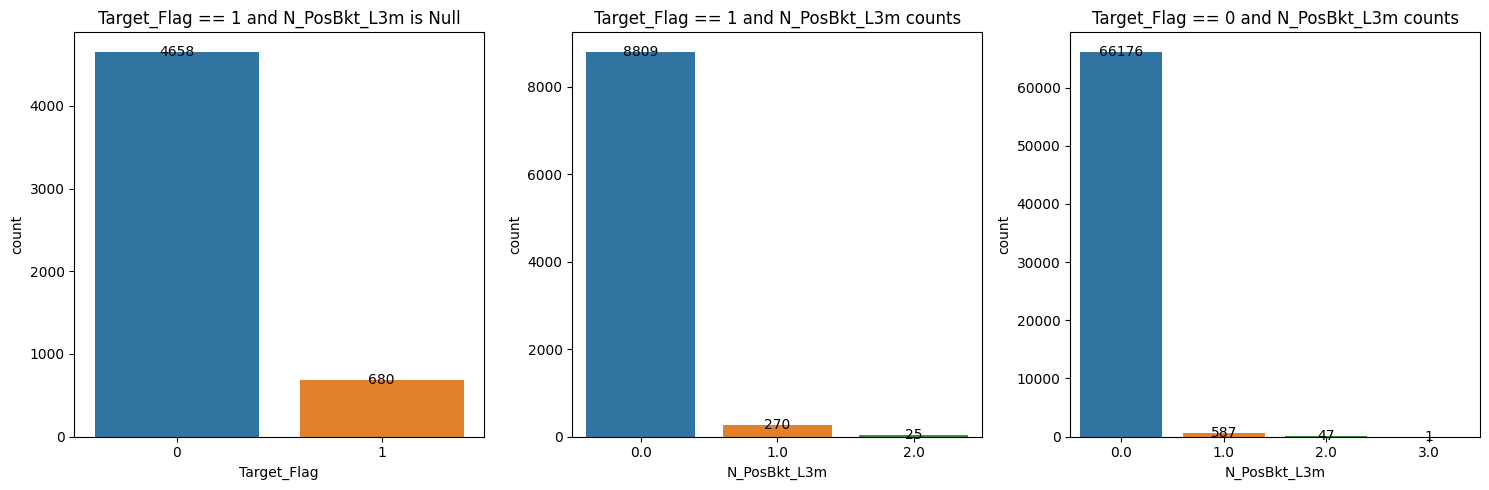

In [28]:
#Let's visualize the distribution of target flag and null values. Also the N_PosBkt_L3m values and target flag
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Target_Flag == 1 and N_PosBkt_L3m is NaN
sns.countplot(data=df[df['N_PosBkt_L3m'].isna()], x='Target_Flag', ax=axes[0])
axes[0].set_title('Target_Flag == 1 and N_PosBkt_L3m is Null')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Plot 2: Target_Flag == 1 and N_PosBkt_L3m counts
sns.countplot(data=df[df['Target_Flag'] == 1], x='N_PosBkt_L3m', ax=axes[1])
axes[1].set_title('Target_Flag == 1 and N_PosBkt_L3m counts')
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Plot 3: Target_Flag == 0 and N_PosBkt_L3m counts
sns.countplot(data=df[df['Target_Flag'] == 0], x='N_PosBkt_L3m', ax=axes[2])
axes[2].set_title('Target_Flag == 0 and N_PosBkt_L3m counts')
for p in axes[2].patches:
    axes[2].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

plt.tight_layout()

plt.show()

We see that for missing values defaults are 680 and not defaults are 4658. Which is a proportionate distribution with whole training data.
* It may also correspond to people who recently took the loan. (Less than 3 months ago)<br>
 Anyway since it merely affects 6% of the data so we can test it out with imputing 0 which is mode of the column, if needed we can try some other methods.

In [29]:
df['N_PosBkt_L3m'].mode()

0    0.0
Name: N_PosBkt_L3m, dtype: float64

Now remaining two columns with missing values are:
1. Max_DPD_L3m
2. Max_Loan_Balance_Others

In [30]:
df['Max_DPD_L3m'].isna().sum()

243

<Axes: >

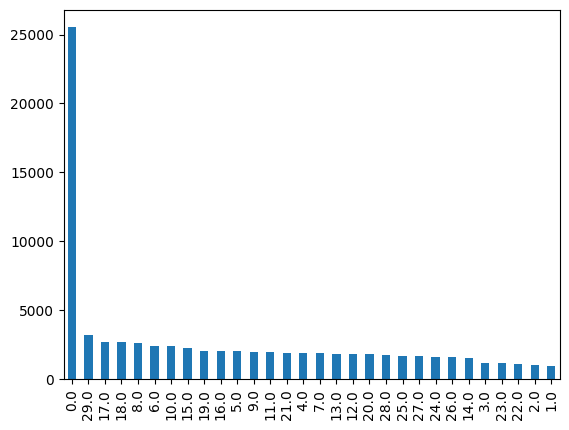

In [31]:
df['Max_DPD_L3m'].value_counts().plot(kind='bar')

More than 25000 values are 0's compared to it 243 values are insignificant so we can safely impute them with zeroes as well.

In [32]:
df['Target_Flag'][df['Max_DPD_L3m'].isna()].value_counts()

0    219
1     24
Name: Target_Flag, dtype: int64

In [33]:
df['Target_Flag'][df['Max_DPD_L3m'] == 0.0].value_counts()

0    23603
1     1913
Name: Target_Flag, dtype: int64

In [34]:
df['Target_Flag'][df['Max_DPD_L3m'] > 0.0].value_counts()

0    47647
1     7847
Name: Target_Flag, dtype: int64

We see that about 7.5% of customer defaulted when their days delay in payment was 0.
Also about 14.12% of people defaulted otherwise.

One interesting way to solve this problem would be imputing 0.0 in case target flag is 0 and  15.0 or higher when target flag is 1.
We can also try this.

### Now for column "Max_Loan_Balance_Others":

In [35]:
df['Max_Loan_Balance_Others'].isna().sum()

341

In [36]:
df['Target_Flag'][df['Max_Loan_Balance_Others'].isna()].value_counts()

0    298
1     43
Name: Target_Flag, dtype: int64

In [37]:
df['Max_Loan_Balance_Others'].describe()

count    8.091200e+04
mean     1.462583e+05
std      4.509210e+05
min     -5.425000e+03
25%      9.992000e+03
50%      1.999900e+04
75%      1.100060e+05
max      6.553632e+07
Name: Max_Loan_Balance_Others, dtype: float64

We see there are some negative values in this column lets make them positive.

In [38]:
df['Max_Loan_Balance_Others'] = df['Max_Loan_Balance_Others'].abs()

In [39]:
df['Target_Flag'][df['Max_Loan_Balance_Others'] == 0].value_counts()

0    1787
1     212
Name: Target_Flag, dtype: int64

1. There are zeroes in this column which suggest that column includes people with zero loan. <br>
2. There are very less null values it may quite simply mean that these customer doesn't even have a bank account in other banks.
3. Distribution of target flag over different range of percentile is more or less similar.
4. Moreover distribution of target flag is also quite similar in case when loan balance with others is 0.

 -----> In any case filling these null values with 0 will do no harm.

 ----

In [40]:
df['Branch_Code'].nunique()

45722

We see that branch code have lots of unique values they wont be of any use while training the model so we can drop them as well.

In [41]:
df['Age'].corr(df['Birth_Year'])

-1.0

Also we see that age and birth year are highly correlated so we can drop one of them let's say 'Birth_Year'

<h2 style="text-align:center;">Preprocessing</h2>

In [42]:
df.drop(columns=['Birth_Year', 'Branch_Code','CoAp_Income', 'Max_Ratio_OC_Pending_POS', 'Total_Field_Trails', 'Total_Resolved'], inplace=True)
df['Perc_Paymode_Cheq_Fail'].fillna(0.5, inplace=True)
df['Max_Perc_Def_Chg_Pending'].fillna(100.0, inplace=True)
df['N_PosBkt_L3m'].fillna(0.0, inplace=True)
df['Max_DPD_L3m'].fillna(0.0, inplace=True)
df['Max_Loan_Balance_Others'].fillna(0.0, inplace=True)


In [43]:
df['Ever_Default_L12M'].value_counts()

Yes    64364
No     16889
Name: Ever_Default_L12M, dtype: int64

Let's change these yes and no to numerical values 1 and 0.

In [44]:
df['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0}, inplace=True)


Some other columns like family member and work exp are negative which are not possible so we need to take them to be positive.

In [45]:
df[df<0].sum()

N_Default_L3m                   0.0
Max_Utilization                 0.0
Max_Perc_Def_Chg_Pending        0.0
N_Family_Member            -72340.0
N_PosBkt_L3m                    0.0
Ever_Default_L12M               0.0
Perc_Paymode_Online             0.0
Perc_Repay_Fail                 0.0
Max_DPD_L3m                     0.0
Perc_Paymode_Cheq_Fail          0.0
Age                             0.0
N_Enq_L9m                       0.0
Max_Loan_Balance_Others         0.0
N_WorkEx_Yr                -44949.0
Target_Flag                     0.0
dtype: float64

In [46]:
df['N_Family_Member'] = df['N_Family_Member'].abs()
df['N_WorkEx_Yr'] = df['N_WorkEx_Yr'].abs()

Now lets look at the data.

In [47]:
df.sample(20)

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,
52973,3,76,99.0,7,0.0,1,0.125000,0.375000,23.0,0.600000,49,0,15873.0,6,0
49773,0,79,100.0,5,0.0,0,0.000000,0.000000,0.0,0.500000,27,1,17904.0,7,0
649,3,52,100.0,8,0.0,1,0.000000,0.333333,17.0,0.500000,44,0,7418.0,24,0
40370,2,64,100.0,3,0.0,1,0.400000,0.400000,28.0,1.000000,41,1,2942604.0,3,0
3647,1,39,0.0,8,0.0,1,0.250000,0.125000,29.0,0.250000,38,2,220331.0,18,0
22696,1,100,100.0,4,0.0,1,0.000000,0.250000,5.0,0.500000,45,0,60681.0,25,1
42990,3,51,100.0,7,0.0,1,0.250000,0.375000,14.0,0.600000,36,0,5363.0,12,0
69402,1,100,100.0,3,0.0,1,0.000000,0.250000,29.0,0.500000,27,0,0.0,7,0
80416,1,100,100.0,11,0.0,1,0.000000,0.250000,9.0,0.500000,32,0,29248.0,12,0


Now lets Identify if their are any outliers.

In [48]:
df.columns

Index(['N_Default_L3m', 'Max_Utilization', 'Max_Perc_Def_Chg_Pending',
       'N_Family_Member', 'N_PosBkt_L3m', 'Ever_Default_L12M',
       'Perc_Paymode_Online', 'Perc_Repay_Fail', 'Max_DPD_L3m',
       'Perc_Paymode_Cheq_Fail', 'Age', 'N_Enq_L9m', 'Max_Loan_Balance_Others',
       'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

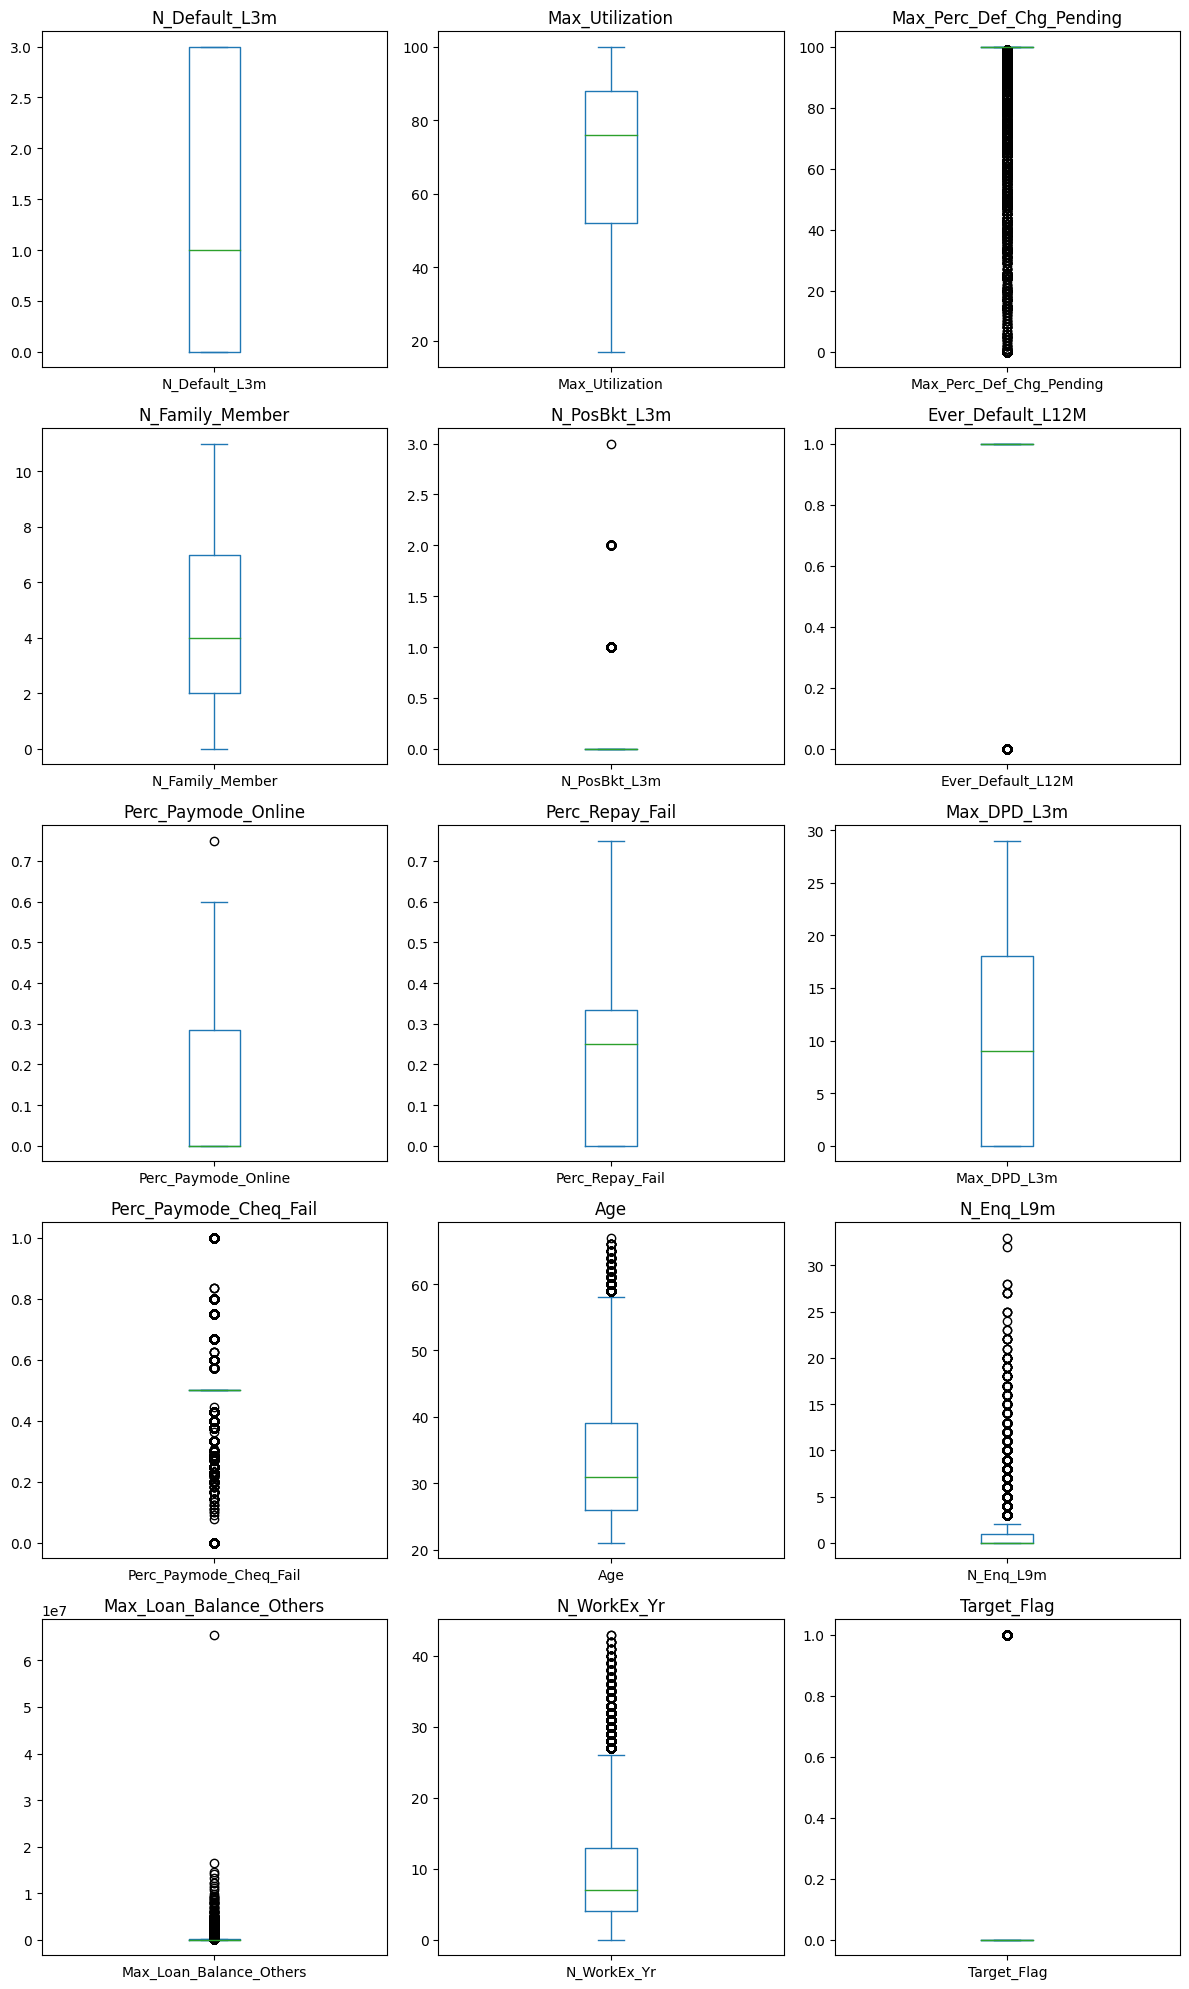

In [49]:
numerical_cols = df.select_dtypes(exclude=['object']).columns


num_plots = len(numerical_cols)
num_columns = 3
num_rows = (num_plots + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    df[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


scaling
log sorting for skewed data
binning

model selection
hyperparameter tunning


We see there are some columns with outliers:
1. N_Enq_L9m
2. Max_Loan_Bal_Others
3. No_Family_Member can also be examined

In [50]:

result = {}
for value in df['N_Enq_L9m'].unique():
    target_counts = df[df['N_Enq_L9m'] == value]['Target_Flag'].value_counts()
    result[value] = target_counts

result = pd.DataFrame(result)
result.sort_index(axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,32,33
0,45455,13623,5630,2622,1438,801,595,380,273,190,123,91,75,46,25,22,22,12,12,7,9,3.0,3,1,1.0,3.0,3,2.0,1.0,1.0
1,5735,1921,828,447,268,154,116,93,55,47,27,19,14,13,9,10,3,15,2,1,2,NaN,3,1,NaN,NaN,1,NaN,NaN,NaN


We see that after 23 enquiries their are no defaulters so we can eliminate these columns because they might mislead the models.

In [51]:

df = df[df['N_Enq_L9m'] <= 23]

<Axes: xlabel='Customer_No'>

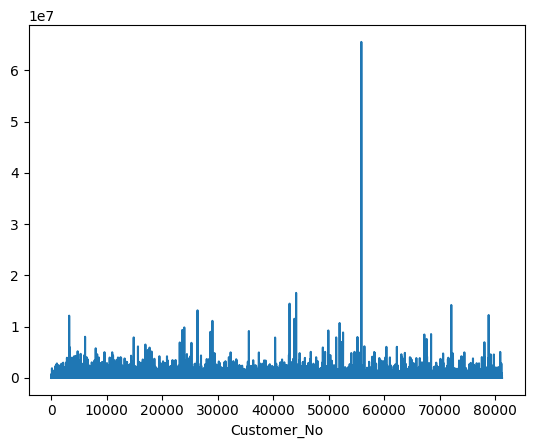

In [52]:
df['Max_Loan_Balance_Others'].plot(kind='line')

In [53]:
#there are data points with values more than 10 times of median, first lets check their distribution and then we will drop them if their are some ambiguity
df['Target_Flag'][df['Max_Loan_Balance_Others']>10000000].value_counts()

0    8
1    2
Name: Target_Flag, dtype: int64

In [54]:
df['Max_Loan_Balance_Others'][df['Max_Loan_Balance_Others']>10000000].value_counts().sort_index()

10711073.0    1
11133197.0    1
11538096.0    1
12138066.0    1
12267116.0    1
13180705.0    1
14224941.0    1
14487955.0    1
16583049.0    1
65536325.0    1
Name: Max_Loan_Balance_Others, dtype: int64

We should eliminate them because they can cause overfitting of model.

In [55]:
df = df[df['Max_Loan_Balance_Others'] <= 10000000]

<Axes: ylabel='Frequency'>

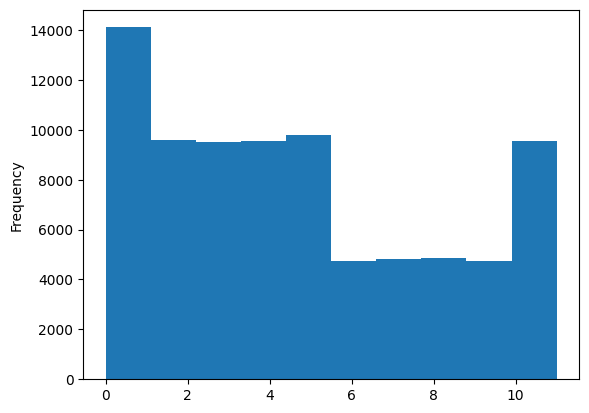

In [56]:
df['N_Family_Member'].plot(kind='hist')

In [57]:
df['N_Family_Member'][df['N_Family_Member']>10].value_counts().sort_index()

11    4765
Name: N_Family_Member, dtype: int64

In [58]:
df['Target_Flag'][df['N_Family_Member']>10].value_counts()

0    4164
1     601
Name: Target_Flag, dtype: int64

In [59]:
df['Target_Flag'][df['N_Family_Member']<=10].value_counts()

0    67286
1     9180
Name: Target_Flag, dtype: int64

We cannot conclude anything from N_family_member column so we won't change that.

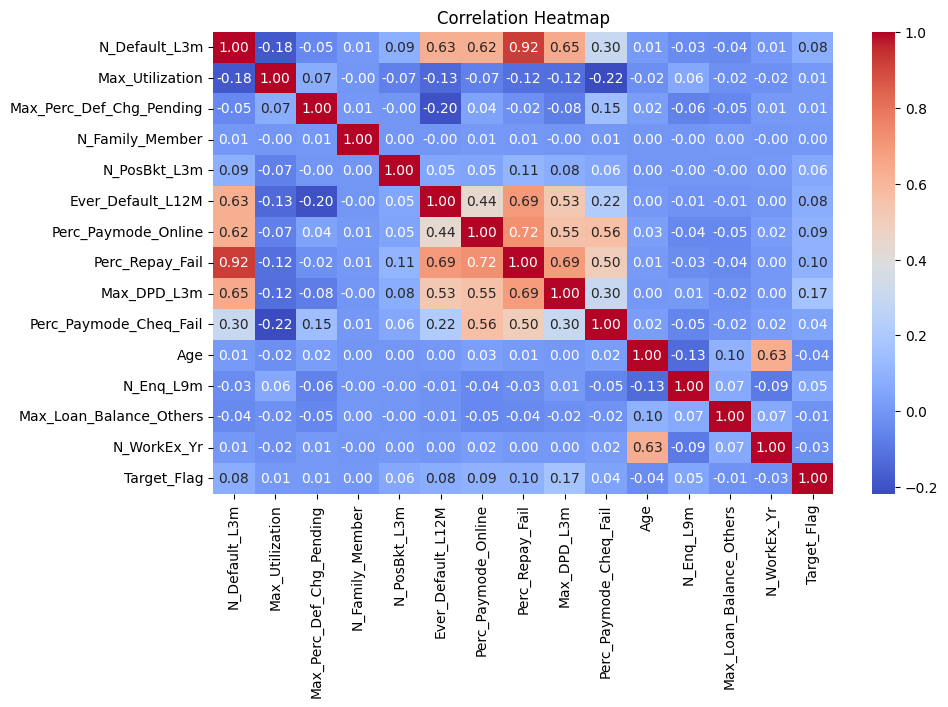

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We can see from the heatmap that perc_repay_fail is highly correlated with multiple other columns so, to ensure less overfitting we can consider removing it.

In [61]:
df_copy = df.copy()

In [62]:
df.drop(columns='Perc_Repay_Fail', inplace=True)

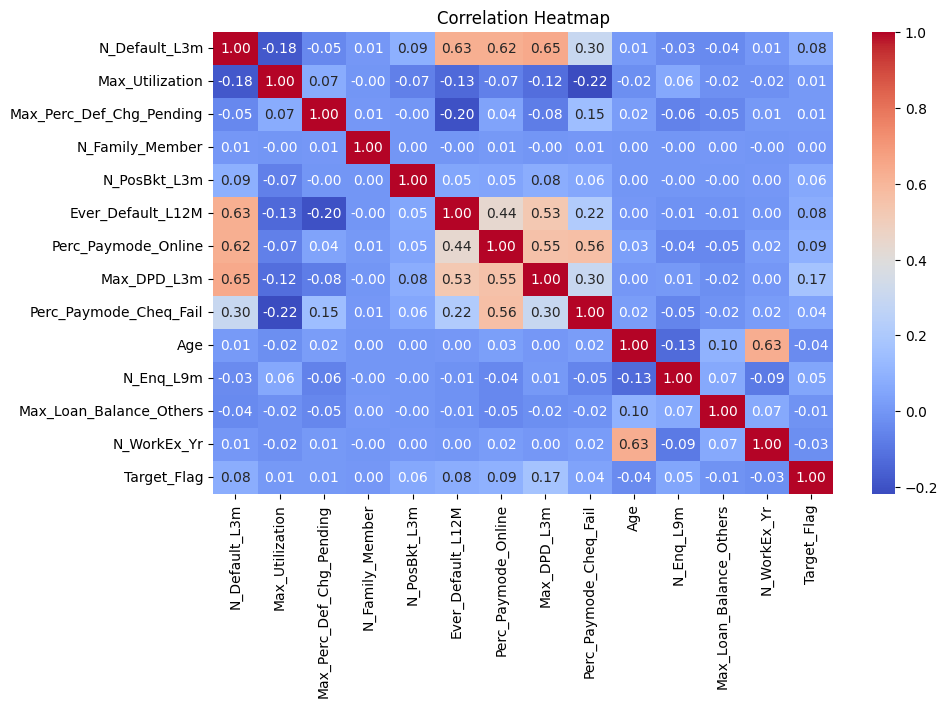

In [63]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


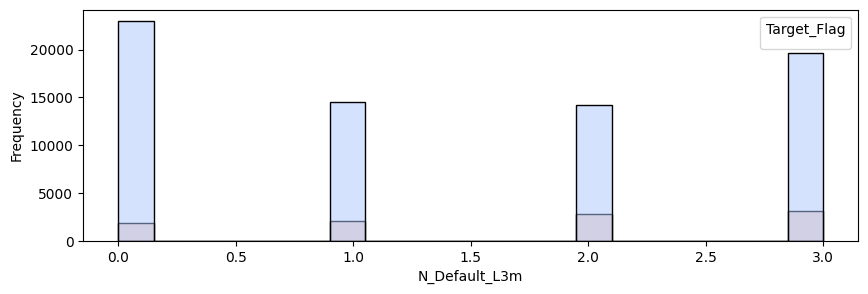

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


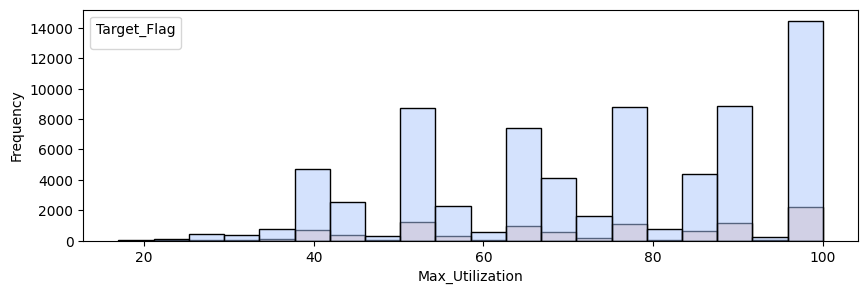

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


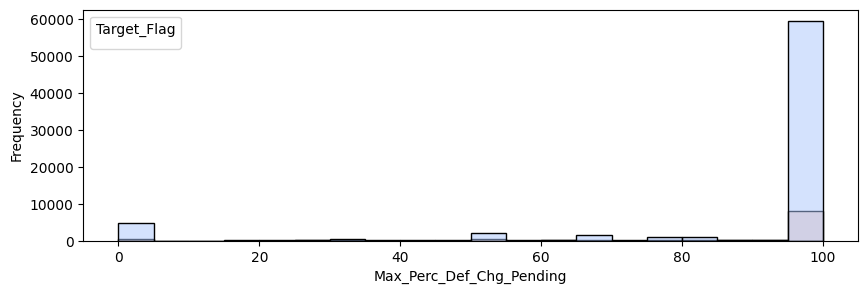

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


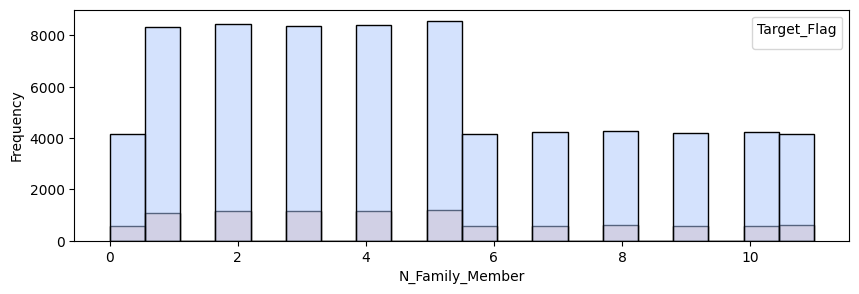

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


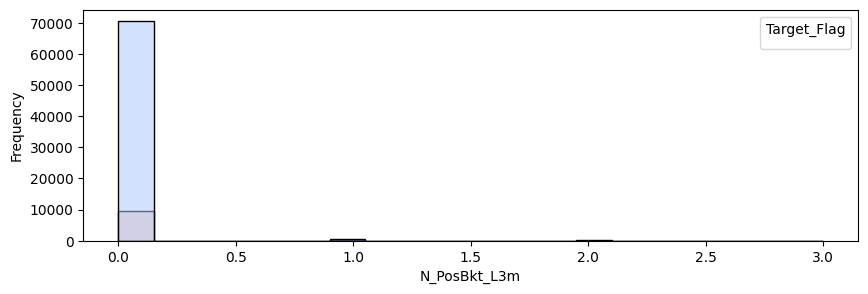

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


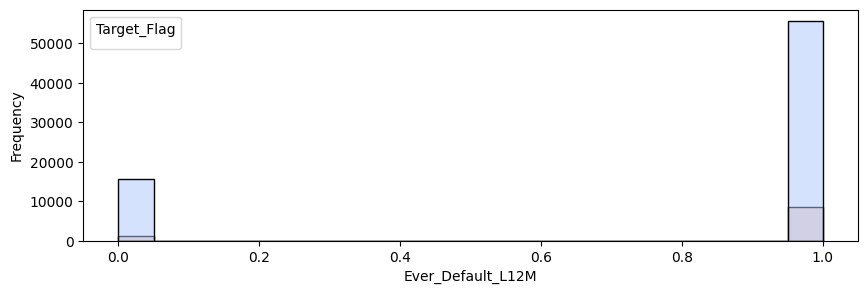

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


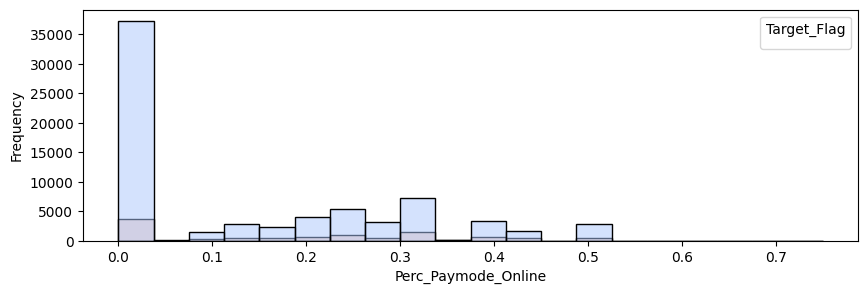

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


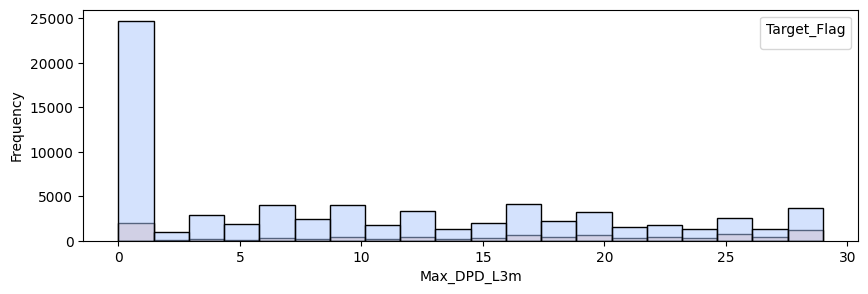

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


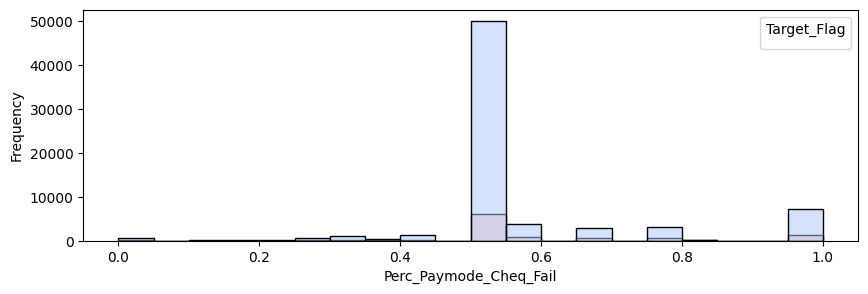

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


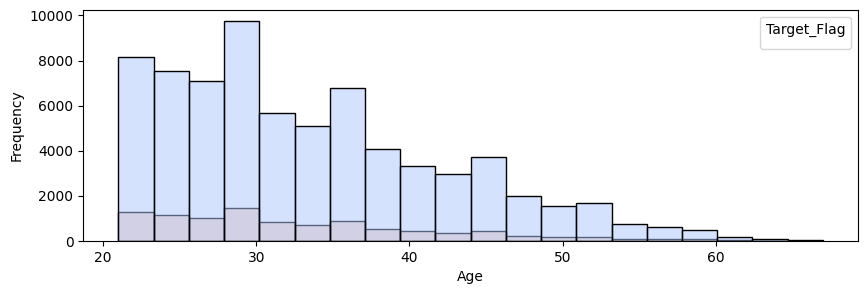

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


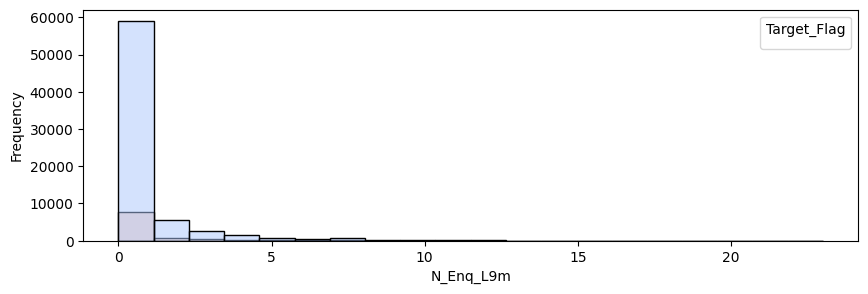

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


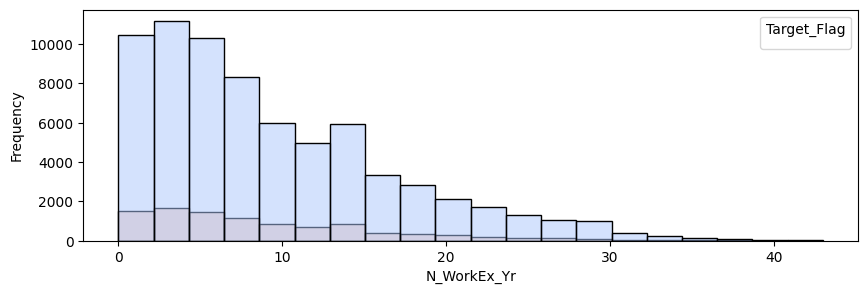

In [64]:
cols = ['N_Default_L3m', 'Max_Utilization', 'Max_Perc_Def_Chg_Pending',
       'N_Family_Member', 'N_PosBkt_L3m', 'Ever_Default_L12M',
       'Perc_Paymode_Online', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'N_Enq_L9m','N_WorkEx_Yr']
for col in cols:
    # Create a histogram with color mapping based on 'Target_Flag'
    plt.figure(figsize=(10,3))
    sns.histplot(data=df, x=col, hue='Target_Flag', bins=20, palette='coolwarm')

    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add a legend
    plt.legend(title='Target_Flag')

    # Show the plot
    plt.show()

In [65]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,
1,3,38,100.0,5,0.0,1,0.285714,19.0,0.750,46,0,5527.0,15,0
2,1,68,100.0,1,0.0,1,0.000000,2.0,0.500,33,0,12104.0,2,0
3,1,39,50.0,3,0.0,1,0.200000,25.0,1.000,28,1,153179.0,8,0
4,0,76,100.0,0,0.0,0,0.000000,0.0,0.500,26,2,181589.0,6,0
5,3,23,33.0,11,0.0,1,0.250000,19.0,0.375,28,1,10661.0,8,0


Now that our data is preprocessed we can move forward for scaling the data because since categorical data are already encoded so there is no need for encoding.

In [66]:
#Helper function for scaling and train test splitting
def split_and_scale(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['Target_Flag'].copy()
    X = df.drop('Target_Flag', axis=1).copy()
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [67]:
X_train, X_test, y_train, y_test = split_and_scale(df)

Since our data is so much imbalanced lets also do some sampling techniques to see if they perform better or not.

In [99]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_undersampled))

Class distribution after undersampling: Counter({0: 7808, 1: 7808})


In [101]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


ros = RandomOverSampler(random_state=42)

X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after oversampling:", Counter(y_oversampled))

Class distribution after oversampling: Counter({0: 57176, 1: 57176})


SMOTE OVERSAMPLING

In [105]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample your training data
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [68]:
X_test.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,0.452018,-0.231721,0.389106,-0.866373,-0.104377,0.512885,1.166217,0.876697,0.587702,-0.379193,-0.481887,-0.365967,0.075412
1,0.452018,-1.013183,0.389106,1.318341,-0.104377,0.512885,-0.878180,-0.456416,-0.369572,-0.713488,-0.481887,-0.373061,-0.331003
2,-1.226204,1.331204,0.389106,0.069933,-0.104377,-1.949753,-0.878180,-1.071699,-0.369572,-0.824920,-0.481887,0.524268,-0.466474
3,0.452018,1.331204,0.389106,0.382035,-0.104377,0.512885,0.348458,0.158867,0.587702,-0.713488,-0.481887,0.402970,-0.331003
4,0.452018,-1.062025,-0.841152,0.694137,-0.104377,0.512885,1.166217,0.363962,2.502249,-0.490625,-0.481887,-0.347705,-0.060060


In [71]:
X_train, X_test, y_train, y_test = split_and_scale(df)

In [72]:
#Helper fuctions for evaluating the models:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [73]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Model testing:


In [74]:
models = []

class_weight = sum(y_train == 1)/sum(y_train == 0)
models.append(("XGBClassifier", XGBClassifier(objective = "binary:logistic" ,scale_pos_weight=class_weight,  random_state = 42)))

from collections import Counter
class_counts = Counter(y_train)
total_samples = len(y_train)
class_weights = [total_samples / (class_counts[i] * len(class_counts)) for i in range(len(class_counts))]
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , class_weights=class_weights, verbose = 0)))


models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42 , solver = "liblinear")))
models.append(("KNeigbors", KNeighborsClassifier()))

In [75]:
def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)

    pred = model[1].predict_proba(X_test)
    print(model[1])
 
    
    return model, get_roc_auc(y_test, pred[:,1])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


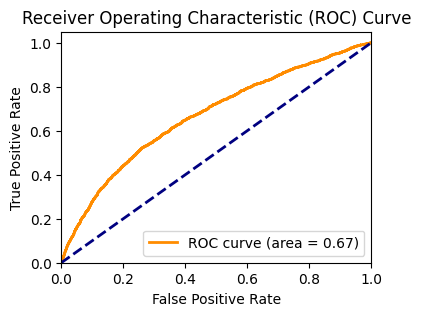

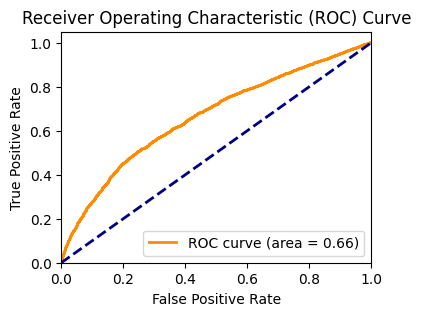

RandomForestClassifier(n_estimators=200, random_state=42)


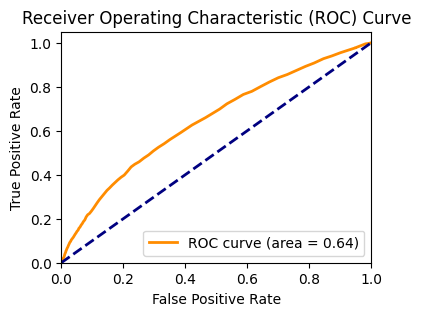

ExtraTreesClassifier(n_estimators=200, random_state=42)


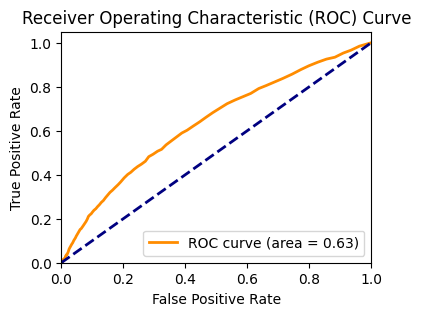

BaggingClassifier(n_estimators=200, random_state=42)


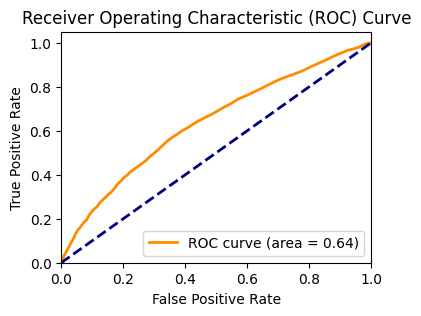

GradientBoostingClassifier(random_state=42)


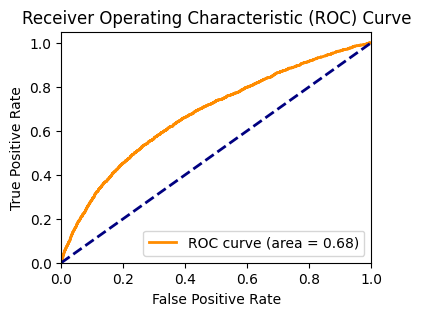

[LightGBM] [Info] Number of positive: 7808, number of negative: 57176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 64984, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120153 -> initscore=-1.990985
[LightGBM] [Info] Start training from score -1.990985
LGBMClassifier(n_estimators=200, random_state=42)


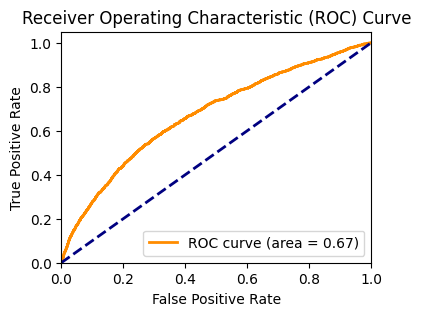

LogisticRegression(random_state=42, solver='liblinear')


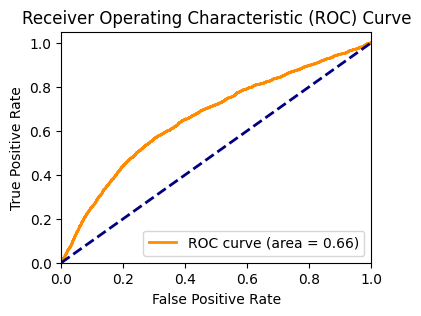

KNeighborsClassifier()


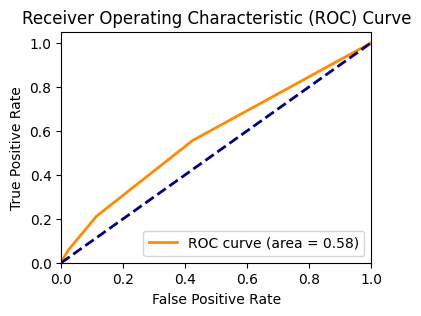

CPU times: total: 3min 24s
Wall time: 3min 38s


In [76]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train , y_train , X_test, y_test)
    pre_final.append(sam)

So far we see that Gradient Boosting Algorithms like: XGBoost, Catboost, LightBGM, GradientBoosting are working best.

If somehow we were to handle the imbalanced data we can improve our models.

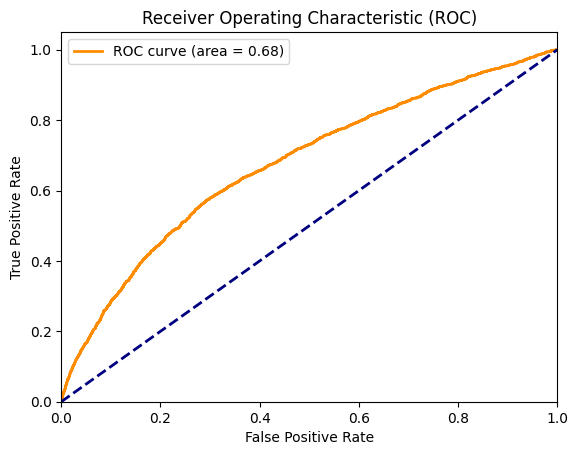

In [77]:
# XGBOOST with better parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 50,
    'random_state': 42,

}





clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()


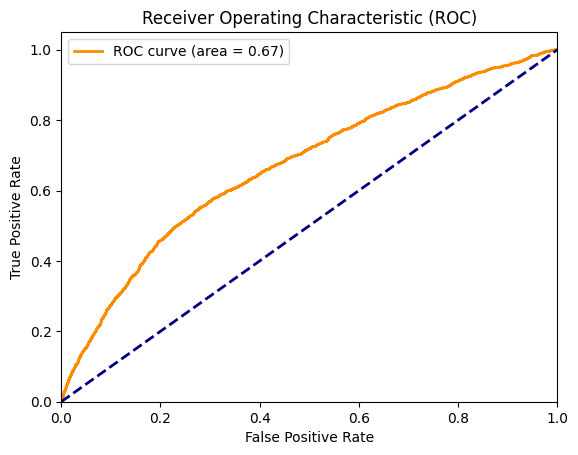

In [102]:
# XGBOOST with better parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 50,
    'random_state': 42,

}





clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_undersampled, y_undersampled)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

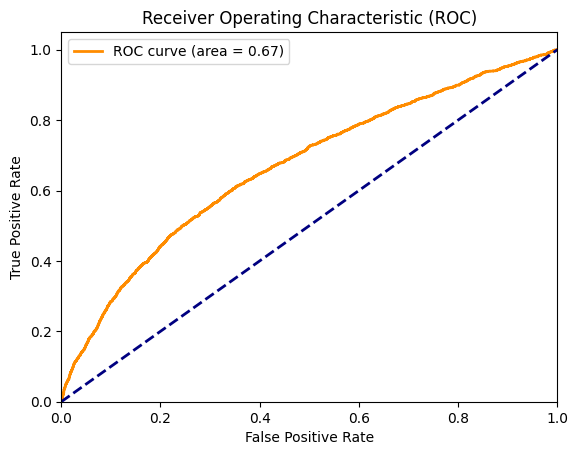

In [103]:
# XGBOOST with Over Sampler
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 50,
    'random_state': 42,

}





clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_oversampled, y_oversampled)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

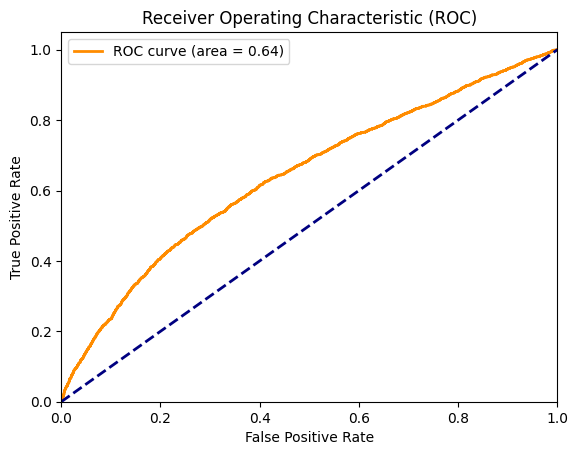

In [106]:
# XGBOOST with Smote Sampler
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 50,
    'random_state': 42,

}





clf = XGBClassifier(**params)

# Train the classifier
clf.fit(X_smote, y_smote)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

We see that sampling is not doing any benefits to the model.

In [78]:
# Using LIGHTGBM WITH BETTER PARAMETERS

import lightgbm as lgb


train_data = lgb.Dataset(X_train, label=y_train)

# Define hyperparameters and enable class imbalance handling
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'is_unbalance': True,  # Enable class imbalance handling
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'seed': 42
}

# Train the LightGBM model
bst = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Number of positive: 7808, number of negative: 57176
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 64984, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120153 -> initscore=-1.990985
[LightGBM] [Info] Start training from score -1.990985


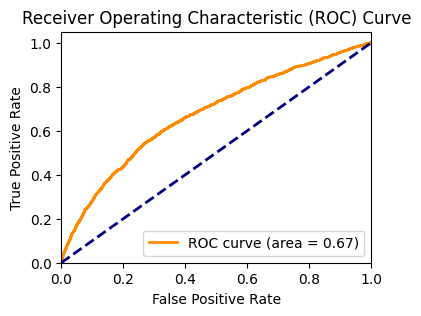

In [79]:
y = bst.predict(X_test)
get_roc_auc(y_test, y)

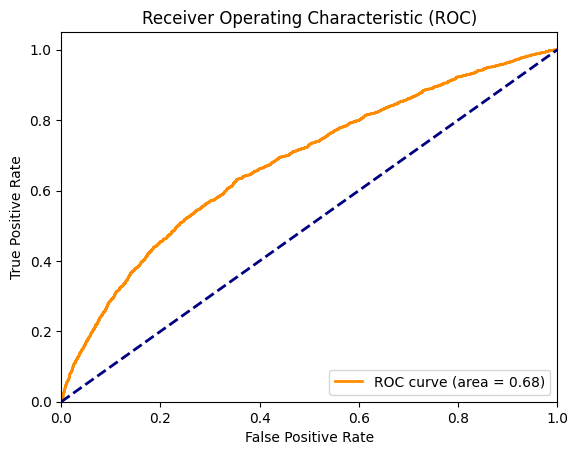

AUC Score: 0.6782355018190437


In [80]:
clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages (adjust as needed)
    learning_rate=0.2,  # Step size shrinkage
    max_depth=3,  # Maximum depth of individual trees
    random_state=42
)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC Score:", roc_auc_score(y_test, y_prob))




In [81]:
param_grid = {
    'n_estimators': [50, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [3, 6, -1],  # Maximum depth of individual trees (-1 means no limit)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

# Create the GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,  # Use cross-validation for evaluation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding ROC AUC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score on Test Data:", roc_auc)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8799242908365361
ROC AUC Score on Test Data: 0.6780280813541306


Using the best Hyper Parameter:

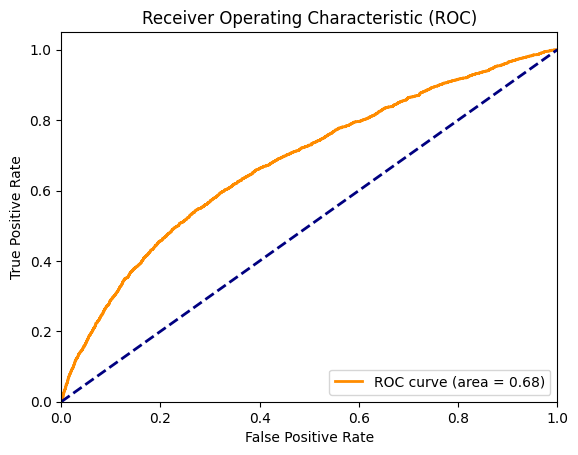

AUC Score: 0.6780280813541306


In [82]:
clf = GradientBoostingClassifier(
learning_rate = 0.1, max_depth = 3, max_features =  'auto', min_samples_leaf =  4, min_samples_split =  10, n_estimators = 200

)

# Train the classifier
clf.fit(X_train, y_train)

# Predict probabilities on the test data
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print("AUC Score:", roc_auc_score(y_test, y_prob))



We can see that our model is not getting better than 0.68 AUC.
Lets try ANN to see if we can do something from that.

### ANN MODEL BUILDING

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score


# model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[])

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model using ROC-AUC
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

We will take this as final model.

Now lets preprocess the validation data:


In [83]:
test = pd.read_csv("Validation Data file.csv", index_col='Customer_No')

In [84]:
test.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,,,,,,,
90000,2,22623,57,100.0,8,NaN,0.0,NaN,Yes,0.142857,0.285714,1990,2.0,0.5,33,NaN,NaN,0,8795.0,13
90001,1,61114,100,100.0,6,NaN,NaN,NaN,Yes,0.000000,0.250000,1971,14.0,0.5,52,NaN,NaN,0,13039.0,1
90002,2,12573,100,100.0,4,NaN,NaN,NaN,Yes,0.500000,0.500000,1999,8.0,1.0,24,0.0,2.0,2,24599.0,-4
90003,0,18210,100,NaN,7,NaN,NaN,NaN,No,0.000000,0.000000,1994,0.0,NaN,29,NaN,NaN,3,48750.0,9
90004,2,41174,100,100.0,1,NaN,NaN,NaN,Yes,0.333333,0.333333,1999,19.0,0.5,24,NaN,NaN,0,55384.0,4


In [85]:
test.drop(columns=['Birth_Year', 'Branch_Code','CoAp_Income', 'Max_Ratio_OC_Pending_POS', 'Total_Field_Trails', 'Total_Resolved'], inplace=True)
test['Perc_Paymode_Cheq_Fail'].fillna(0.5, inplace=True)
test['Max_Perc_Def_Chg_Pending'].fillna(100.0, inplace=True)
test['N_PosBkt_L3m'].fillna(0.0, inplace=True)
test['Max_DPD_L3m'].fillna(0.0, inplace=True)
test['Max_Loan_Balance_Others'].fillna(0.0, inplace=True)
test['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0}, inplace=True)
test['N_Family_Member'] = test['N_Family_Member'].abs()
test['N_WorkEx_Yr'] = test['N_WorkEx_Yr'].abs()

In [86]:
test.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
Customer_No,,,,,,,,,,,,,,
90000,2,57,100.0,8,0.0,1,0.142857,0.285714,2.0,0.5,33,0,8795.0,13
90001,1,100,100.0,6,0.0,1,0.000000,0.250000,14.0,0.5,52,0,13039.0,1
90002,2,100,100.0,4,0.0,1,0.500000,0.500000,8.0,1.0,24,2,24599.0,4
90003,0,100,100.0,7,0.0,0,0.000000,0.000000,0.0,0.5,29,3,48750.0,9
90004,2,100,100.0,1,0.0,1,0.333333,0.333333,19.0,0.5,24,0,55384.0,4


In [87]:
test.drop(columns='Perc_Repay_Fail', inplace=True)

In [88]:
df.shape, test.shape

((81231, 14), (30061, 13))

In [89]:
# Modifying the Helper function for scaling and train test splitting to get scaled test data
def split_and_scale(df, test):
    df = df.copy()
    
    # Split df into X and y
    y = df['Target_Flag'].copy()
    X = df.drop('Target_Flag', axis=1).copy()
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    test = pd.DataFrame(scaler.transform(test), columns=test.columns)
    
    return test

In [90]:
test = split_and_scale(df, test)

In [91]:
test.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr
0,0.452018,-0.768976,0.389106,1.006239,-0.104377,0.512885,-0.002010,-0.866604,-0.369572,-0.044898,-0.481887,-0.367702,0.481826
1,-0.387093,1.331204,0.389106,0.382035,-0.104377,0.512885,-0.878180,0.363962,-0.369572,2.072307,-0.481887,-0.356286,-1.143831
2,0.452018,1.331204,0.389106,-0.242169,-0.104377,0.512885,2.188415,-0.251321,2.502249,-1.047784,0.663377,-0.325190,-0.737417
3,-1.226204,1.331204,0.389106,0.694137,-0.104377,-1.949753,-0.878180,-1.071699,-0.369572,-0.490625,1.236008,-0.260224,-0.060060
4,0.452018,1.331204,0.389106,-1.178475,-0.104377,0.512885,1.166217,0.876697,-0.369572,-1.047784,-0.481887,-0.242378,-0.737417


In [92]:
y_prob = clf.predict_proba(test)[:, 1]